In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import time 

import seaborn as sns

import simple_svm                 # our implementation of SVMs
from sklearn import svm    # sklearn implementation of SVMs for comparison

In [33]:
colors = [sns.color_palette()[0], sns.color_palette()[1]]

In [53]:
def plot_margin(X, y, model):

    x1_min = np.min(X[:,0])
    x1_max = np.max(X[:,0])
    x2_min = np.min(X[:,1])
    x2_max = np.max(X[:,1])
    
    xx = np.linspace(x1_min, x1_max)

    a = -model.w[0]/model.w[1]
    yy = a*xx - (model.b)/(model.w[1])

    margin = 1 / np.sqrt(np.sum(model.w**2))
    yy_neg = yy - np.sqrt(1 + a**2) * margin
    yy_pos = yy + np.sqrt(1 + a**2) * margin

    plt.figure(figsize=(5, 5))
    plt.plot(xx, yy, "b-")
    plt.plot(xx, yy_neg, "m--")
    plt.plot(xx, yy_pos, "m--")

    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
    plt.xlim(0.8*x1_min, 1.2*x1_max)
    plt.ylim(0.8*x2_min, 1.2*x2_max)

    plt.axis("tight")
    plt.show()

# Example 1: Support Vector Machines

Load datset (UCI ML Breast Cancer Wisconsin (Diagnostic) dataset)

C:\Users\Patryk\anaconda3\envs\physics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Patryk\anaconda3\envs\physics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Patryk\anaconda3\envs\physics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Patryk\anaconda3\envs\physics\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a fu

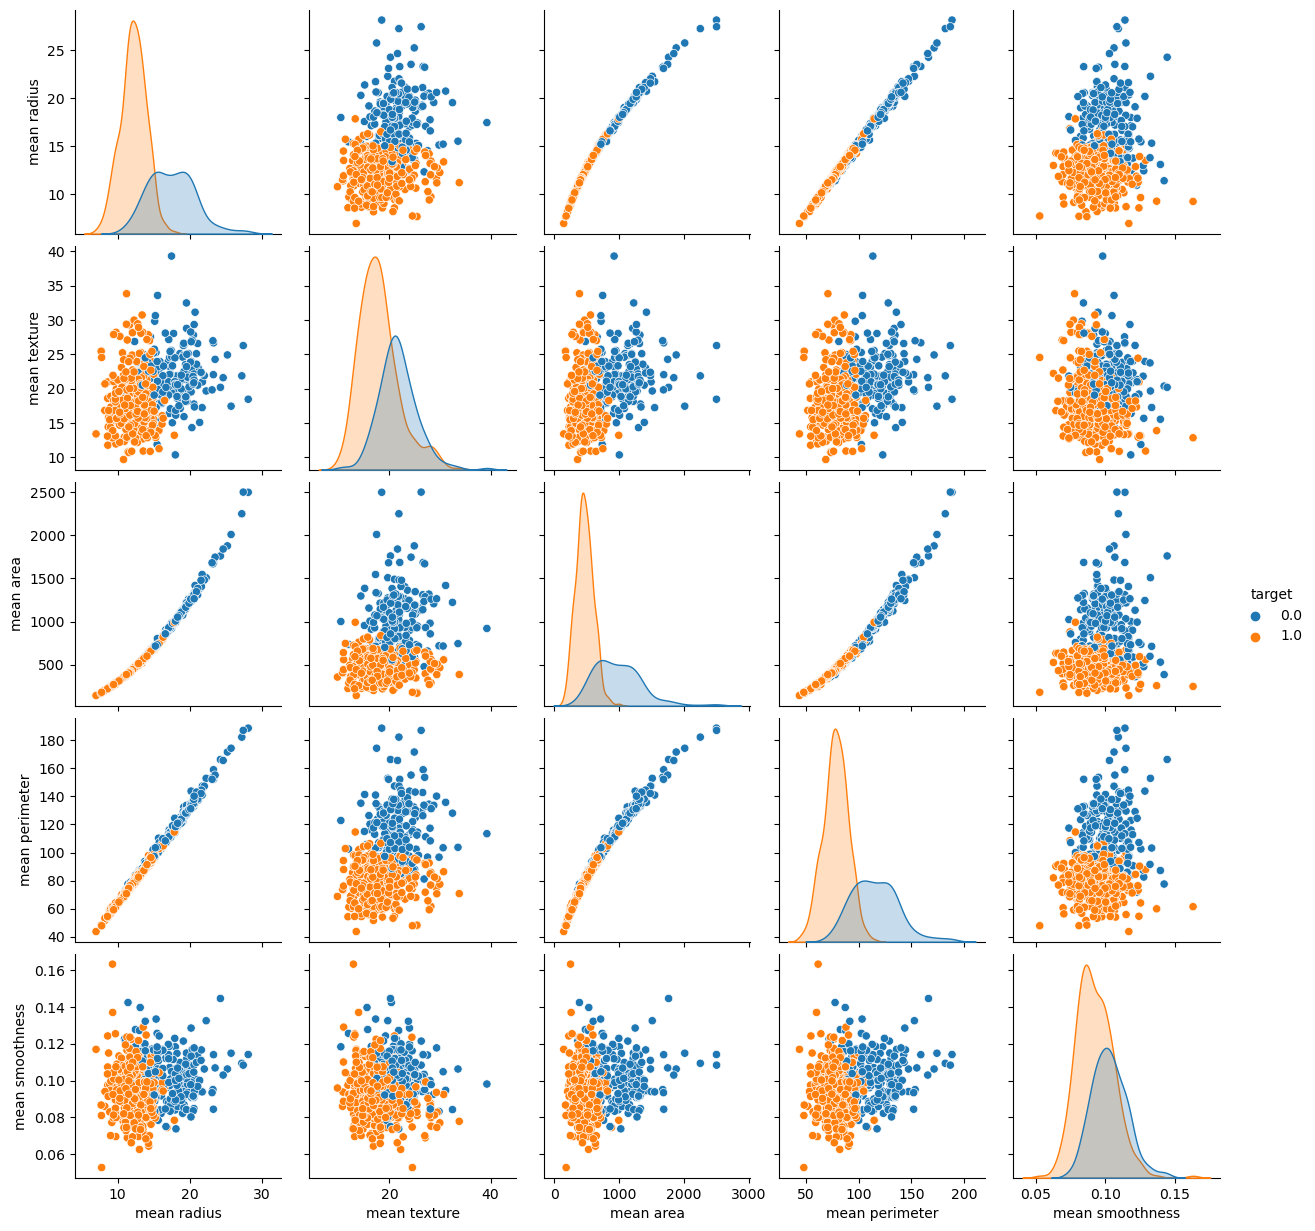

In [35]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
df_cancer = pd.DataFrame(np.c_[cancer['data'],cancer['target']], columns = np.append(cancer['feature_names'],['target']))
df_cancer.head()

df_cancer.replace([np.inf, -np.inf], np.nan, inplace=True)
sns.pairplot(df_cancer, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'])

Create dataset (X, y) with 2 features for simple visualisation (note that in this implementation of SVMs y = -1 or 1

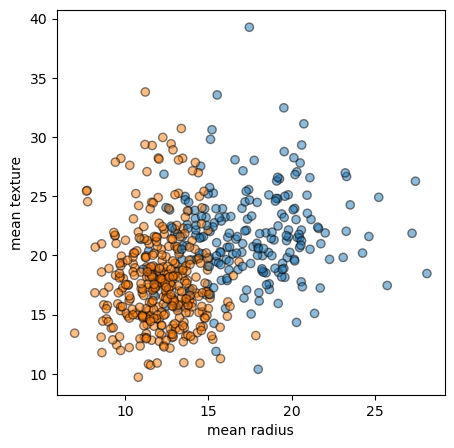

In [56]:
feature1 = 'mean radius'
feature2 = 'mean texture'

X = df_cancer[[feature1, feature2]].to_numpy()
y = df_cancer['target'].to_numpy()
y = np.array([-1.0 if x == 0 else x for x in y]).reshape(len(y), 1) 

plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.show()

Train the model and compare it with Sklearn implementation

     pcost       dcost       gap    pres   dres
 0: -1.2605e+03 -6.4861e+04  2e+05  1e+00  1e-10
 1: -1.0681e+03 -2.9811e+04  4e+04  2e-01  2e-10
 2: -9.6874e+02 -6.7547e+03  7e+03  2e-02  1e-10
 3: -1.0830e+03 -2.4838e+03  1e+03  4e-03  2e-10
 4: -1.1840e+03 -2.2388e+03  1e+03  3e-03  1e-10
 5: -1.2712e+03 -2.0034e+03  8e+02  2e-03  1e-10
 6: -1.3418e+03 -1.8352e+03  5e+02  1e-03  2e-10
 7: -1.3750e+03 -1.7540e+03  4e+02  6e-04  2e-10
 8: -1.4048e+03 -1.6891e+03  3e+02  4e-04  2e-10
 9: -1.4419e+03 -1.6142e+03  2e+02  2e-04  2e-10
10: -1.4582e+03 -1.5819e+03  1e+02  1e-04  2e-10
11: -1.4777e+03 -1.5468e+03  7e+01  6e-05  2e-10
12: -1.4821e+03 -1.5336e+03  5e+01  2e-05  2e-10
13: -1.4923e+03 -1.5184e+03  3e+01  7e-06  2e-10
14: -1.5003e+03 -1.5082e+03  8e+00  1e-06  2e-10
15: -1.5019e+03 -1.5060e+03  4e+00  4e-07  2e-10
16: -1.5029e+03 -1.5049e+03  2e+00  2e-07  2e-10
17: -1.5036e+03 -1.5041e+03  4e-01  1e-08  2e-10
18: -1.5038e+03 -1.5038e+03  7e-03  2e-10  2e-10
19: -1.5038e+03 -1.50

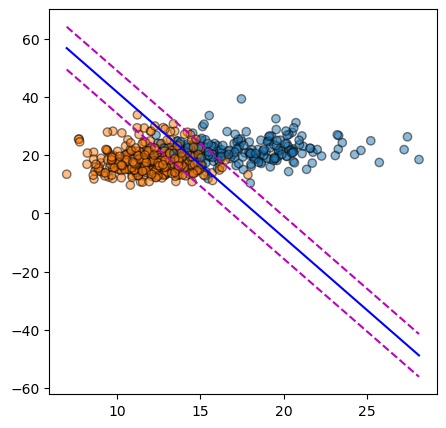

In [57]:
# Our simple implementation
model = simple_svm.SVM(kernel=simple_svm.linear_kernel, C=10.0)

# Train and time the model and time it
t0   = time.perf_counter()
model.fit(X,y)
t1   = time.perf_counter()

print('')
print('This implementation')
print("W:", model.w)
print("b:", model.b)
print(f"Trained in {t1 - t0:.3f} secs")

# Sklearn implementation (for comparison)
clf = svm.SVC(kernel="linear", C=10.0)

t0   = time.perf_counter()
clf.fit(X, y.ravel())
t1   = time.perf_counter()

w_sl = clf.coef_[0]
b_sl = clf.intercept_

print('')
print('Sklearn implementation')
print("W:", w_sl)
print("b:", b_sl)
print(f"Trained in {t1 - t0:.3f} secs")

# Plot the separating line with margins for our implementation
plot_margin(X, y, model) 